In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import warnings 
warnings.filterwarnings('ignore')

In [2]:
kalbe = pd.read_csv("kalbe-cleaned.csv")

In [3]:
kalbe.head()

,Trans_ID,CustID,Date,ProductID,Price,Qty,Total,StoreID,Age,Gender,Marital_status,Income,Product_Name,Store_name,Group_store,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [5]:
cluster = kalbe.groupby(['CustID']).agg({'Trans_ID':'count','Qty':'sum','Total':'sum'}).reset_index()

In [6]:
cluster.head()

,CustID,Trans_ID,Qty,Total
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [7]:

x1 = cluster[['Trans_ID','Qty']]
wcss=[]
for n in range(1,11):
    model1=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
    model1.fit(x1)
    wcss.append(model1.inertia_)
print(wcss)

[77276.11633109619, 27934.073630208124, 13532.081468089984, 9145.863727634951, 5937.101066973469, 4413.994294970425, 3591.4190578810467, 3113.190475754394, 2689.1065586294135, 2315.100795033505]


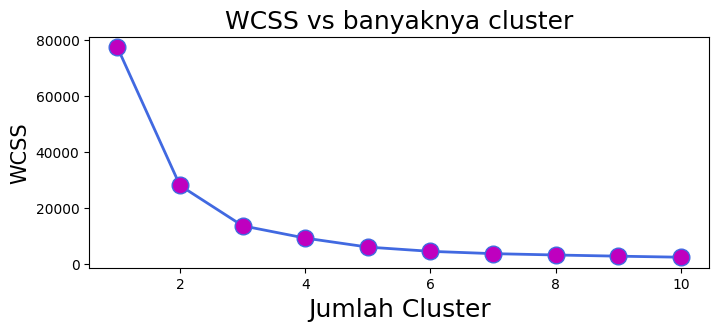

In [8]:
plt.figure(figsize=(8,3))
plt.plot(list(range(1,11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m')
plt.title('WCSS vs banyaknya cluster', fontsize=18)
plt.xlabel('Jumlah Cluster', fontsize=18)
plt.ylabel('WCSS' , fontsize=15)
plt.show()

In [9]:
model1=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state=100)
model1.fit(x1)
labels1=model1.labels_
centroids1=model1.cluster_centers_

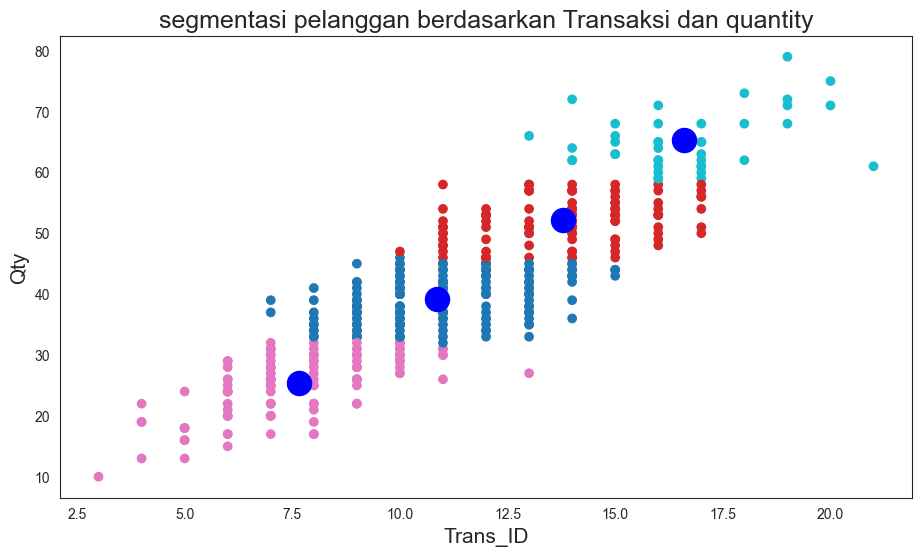

In [10]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=cluster['Trans_ID'],y=cluster['Qty'],c=labels1,cmap='tab10')
plt.scatter(x=centroids1[:,0],y=centroids1[:,1],s=300,c='blue')
plt.xlabel('Trans_ID',fontsize=15)
plt.ylabel('Qty',fontsize=15)
plt.title('segmentasi pelanggan berdasarkan Transaksi dan quantity',fontsize=18)
plt.show()